### Online Or Incremental Learning- Model Retraining Approach

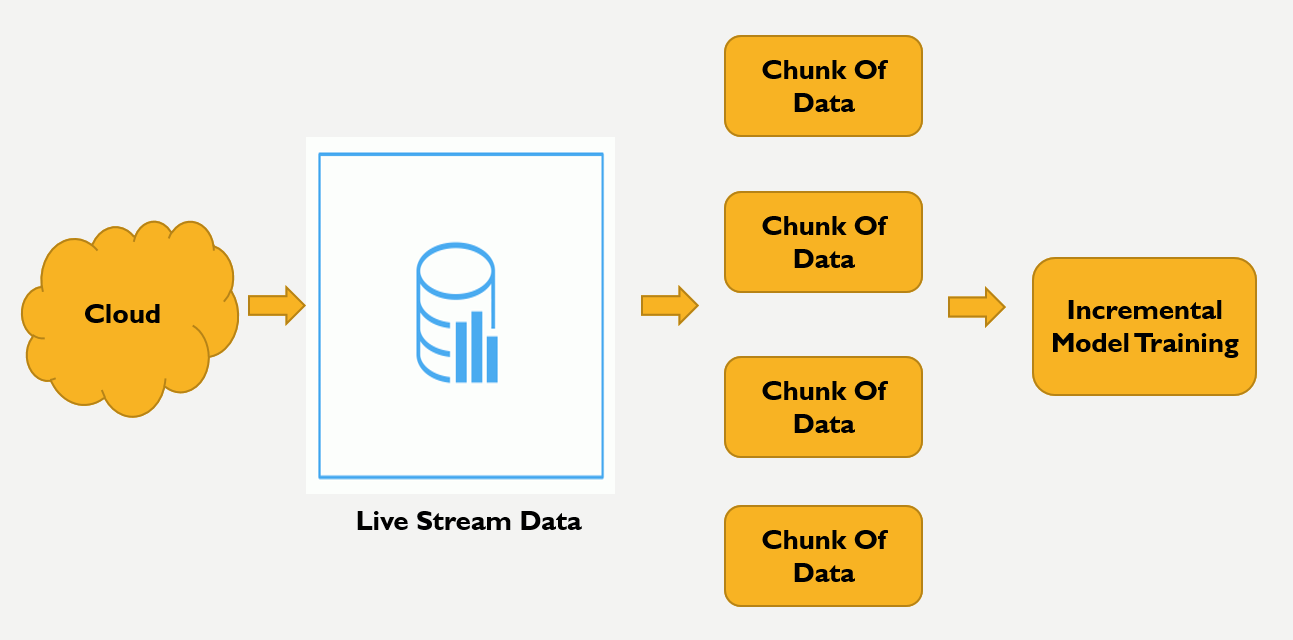

#### Creme
With creme, we encourage a different approach, which is to continuously learn a stream of data. This means that the model process one observation at a time, and can therefore be updated on the fly. This allows to learn from massive datasets that don't fit in main memory. Online machine learning also integrates nicely in cases where new data is constantly arriving. It shines in many use cases, such as time series forecasting, spam filtering, recommender systems, CTR prediction, and IoT applications. If you're bored with retraining models and want to instead build dynamic models, then online machine learning (and therefore creme!) might be what you're looking for.

Here are some benefits of using creme (and online machine learning in general):

1. Incremental: models can update themselves in real-time.
2. Adaptive: models can adapt to concept drift.
3. Production-ready: working with data streams makes it simple to replicate production scenarios during model development.
4. Efficient: models don't have to be retrained and require little compute power, which lowers their carbon footprint
5. Fast: when the goal is to learn and predict with a single instance at a time, then creme is a order of magnitude faster than PyTorch, Tensorflow, and scikit-learn.

In [29]:
import math
from creme import compose
from creme import feature_extraction
from creme import naive_bayes
import creme

In [25]:
docs = [   ('Chinese Beijing Chinese', 'yes'),
 ('Chinese Chinese Shanghai', 'yes'),
('Chinese Macao', 'yes'),
('Tokyo Japan Chinese', 'no')
]

In [31]:
### This is just an example
corpus = [
         'This is the first document.',
        'This document is the second document.',
        'And this is the third one.',
        'Is this the first document?',
    ]
bow = creme.feature_extraction.TFIDF()
for sentence in corpus:
    print(bow.transform_one(sentence))

{'this': 0.4472135954999579, 'is': 0.4472135954999579, 'the': 0.4472135954999579, 'first': 0.4472135954999579, 'document': 0.4472135954999579}
{'this': 0.35355339059327373, 'document': 0.7071067811865475, 'is': 0.35355339059327373, 'the': 0.35355339059327373, 'second': 0.35355339059327373}
{'and': 0.408248290463863, 'this': 0.408248290463863, 'is': 0.408248290463863, 'the': 0.408248290463863, 'third': 0.408248290463863, 'one': 0.408248290463863}
{'is': 0.4472135954999579, 'this': 0.4472135954999579, 'the': 0.4472135954999579, 'first': 0.4472135954999579, 'document': 0.4472135954999579}


In [32]:
model = compose.Pipeline(
    ('tokenize', feature_extraction.BagOfWords(lowercase=False)),
    ('nb', naive_bayes.MultinomialNB(alpha=1)))

In [34]:
%%time
for sentence, label in docs:
     model = model.fit_one(sentence, label)

Wall time: 0 ns


In [35]:
new_unseen_text = 'Tokyo india'

In [36]:
model.predict_one(new_unseen_text)

'no'

#### Training on a new data and new category

In [37]:
model.fit_one('India USA','may be')

Pipeline (
  BagOfWords (
    on=None
    strip_accents=True
    lowercase=False
    preprocessor=None
    tokenizer=<built-in method findall of re.Pattern object at 0x00000236CF37D5E0>
    ngram_range=(1, 1)
  ),
  MultinomialNB (
    alpha=1
  )
)

In [38]:
model.predict_one("India Germany")

'may be'

#### Creme With Logistic Regression

In [24]:
from creme import compose
from creme import datasets
from creme import linear_model
from creme import metrics
from creme import preprocessing

X_y = datasets.Phishing()

model = compose.Pipeline(
   preprocessing.StandardScaler(),
 linear_model.LogisticRegression()
)
metric = metrics.Accuracy()


for x, y in X_y:
    y_pred = model.predict_one(x)      # make a prediction
    metric = metric.update(y, y_pred)  # update the metric
    model = model.fit_one(x, y)        # make the model learn

metric

Accuracy: 89.20%

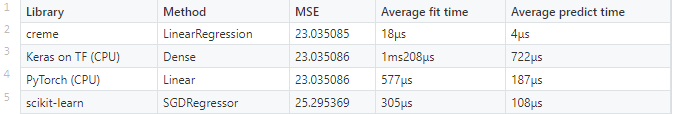